<a href="https://colab.research.google.com/github/m3sibti/DL_projects/blob/master/Keras_ConditionalGAN_mw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conditional GANs

## Imports

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers

## Prepare MNIST Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train.shape, np.min(x_train), np.max(x_train), y_train.shape

((60000, 28, 28), 0.0, 1.0, (60000, 10))

## Create Models

### Generator

In [0]:
def get_generator(z_shape, l_shape):
  z_input = keras.Input(shape=(z_shape,))
  label_input = keras.Input(shape=(l_shape,))
  x = layers.Concatenate()([z_input, label_input])
  x = layers.Dense(256, activation='relu')(x)
  output = layers.Dense(784, activation='sigmoid')(x)
  
  model = keras.Model([z_input, label_input], output)
  return model 

In [0]:
generator = get_generator(100, 10)

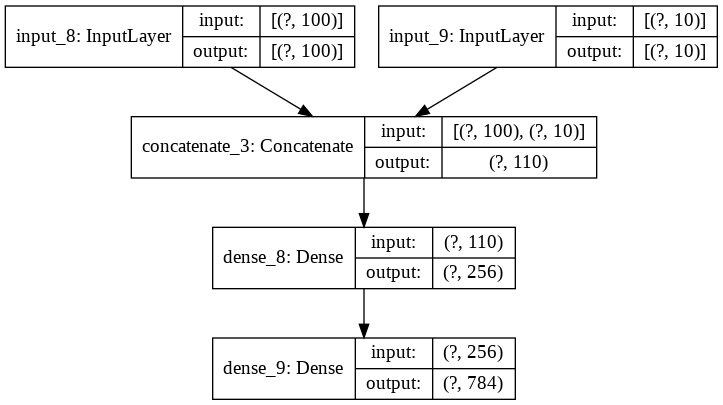

In [18]:
keras.utils.plot_model(generator, show_shapes=True)

### Discriminator

In [0]:
def get_discriminator(i_shape, l_shape):
  img_input = keras.Input(shape=(i_shape,))
  label_input = keras.Input(shape=(l_shape,))
  x = layers.Concatenate()([img_input, label_input])
  x = layers.Dense(256, activation=tf.nn.leaky_relu)(x)
  outputs = layers.Dense(1, activation='sigmoid')(x)

  model = keras.Model([img_input, label_input], outputs)
  return model

In [0]:
discriminator = get_discriminator(784, 10)

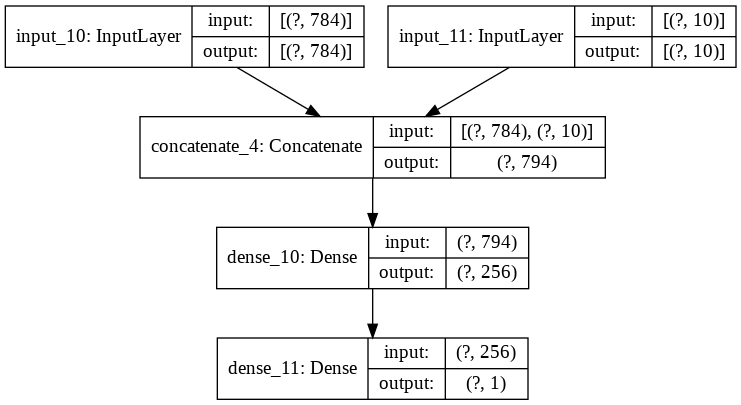

In [21]:
keras.utils.plot_model(discriminator, show_shapes=True)

## Override the train_step

In [0]:
class CGAN(keras.Model):

  def __init__(self):
    pass

  def compile(self):
    pass

  def train_step(self, data):
    pass